## Model Training

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/stud.csv')
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [3]:
x = df.drop(columns=['math_score'])
x.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [4]:
y = df[['math_score']]
y.head()

,math_score
0,72
1,69
2,90
3,47
4,76


In [5]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   reading_score                1000 non-null   int64 
 6   writing_score                1000 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 54.8+ KB


In [8]:
numerical_features = x.select_dtypes(include=['int64']).columns
categorical_feature = x.select_dtypes(include=[object]).columns

In [10]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
scaler_transform = StandardScaler()
one_hot_transformer = OneHotEncoder()

In [11]:
transformer = ColumnTransformer([('StandardScaler',scaler_transform,numerical_features),('OneHotEncoder',one_hot_transformer,categorical_feature)])

In [12]:
x_transformed = transformer.fit_transform(x)

In [16]:
pd.DataFrame(x_transformed).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.193999,0.391492,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1.427476,1.313269,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,1.770109,1.642475,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,-0.833899,-1.583744,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.605158,0.457333,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [17]:
x_transformed.shape

(1000, 19)

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_transformed,y,test_size=0.25,random_state=42)

In [20]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
def model_performance(actual,predicted):
    mae = mean_absolute_error(actual,predicted)
    rmse = np.sqrt(mean_squared_error(actual,predicted))
    r2_value = r2_score(actual,predicted)
    return mae,rmse,r2_value

In [22]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor


In [23]:
models = {
    'Linear Regression':LinearRegression(),
    'Ridge Regression':Ridge(),
    'Lasso Regression':Lasso(),
    'Random Forest Regressor':RandomForestRegressor(),
    'K Nearest Regressor':KNeighborsRegressor(),
    'Support Vector Regressor': SVR(),
    'Adaboost Regressor':AdaBoostRegressor(),
    'GradientBoost Regressor':GradientBoostingRegressor(),
    'XGBoost Regressor':XGBRegressor(),
    'Decision Tree Regressor':DecisionTreeRegressor(),
    'CatBoost Regressor':CatBoostRegressor(verbose=False)
}

In [36]:
model_list = []
r2_score_test_list = []
r2_score_train_list = []

In [37]:
for model_name in models:
    model = models[model_name]
    model_list.append(model_name)

    #Training the model
    model.fit(x_train,y_train)

    #Predicting the model
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    # Evaluating the perfromance of the model
    mae_train,rmse_train,r2_value_train = model_performance(y_train,y_pred_train)
    r2_score_train_list.append(r2_value_train)
    mae_test,rmse_test,r2_value_test = model_performance(y_test,y_pred_test)
    r2_score_test_list.append(r2_value_test)
    print(f"==========={model_name}==============")
    print('Model performance for Training set')
    print(f"- Root Mean Squared Error: {rmse_train}")
    print(f"- Mean Absolute Error: {mae_train}")
    print(f"- R2 Score: {r2_value_train}")

    print('----------------------------------')
    
    print('Model performance for Test set')
    print(f"- Root Mean Squared Error: {rmse_test}")
    print(f"- Mean Absolute Error: {mae_test}")
    print(f"- R2 Score: {r2_value_test}")   
    print('='*35)
    print('\n')
    




===========Linear Regression==============
Model performance for Training set
- Root Mean Squared Error: 5.297244966554282
- Mean Absolute Error: 4.238267465725305
- R2 Score: 0.8742732380399838
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.482528123659772
- Mean Absolute Error: 4.337930600167403
- R2 Score: 0.8778243107659014


===========Ridge Regression==============
Model performance for Training set
- Root Mean Squared Error: 5.297563633731872
- Mean Absolute Error: 4.236822709293622
- R2 Score: 0.8742581108568038
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.478806037015033
- Mean Absolute Error: 4.33537241938823
- R2 Score: 0.8779901445296864


===========Lasso Regression==============
Model performance for Training set
- Root Mean Squared Error: 6.551500056369396
- Mean Absolute Error: 5.183725467135435
- R2 Score: 0.8076867909314052
----------------------------------
Model perform

In [42]:
perf_df = pd.DataFrame({'Model Name':model_list,'R2 Score Test':r2_score_test_list,'R2 Score Train':r2_score_train_list}).sort_values(by =['R2 Score Test'],ascending=False)

In [44]:
perf_df

,Model Name,R2 Score Test,R2 Score Train
1,Ridge Regression,0.877990,0.874258
0,Linear Regression,0.877824,0.874273
7,GradientBoost Regressor,0.873405,0.904401
10,CatBoost Regressor,0.854830,0.961155
3,Random Forest Regressor,0.849110,0.976474
6,Adaboost Regressor,0.847618,0.850775
8,XGBoost Regressor,0.837904,0.996544
2,Lasso Regression,0.820028,0.807687
4,K Nearest Regressor,0.792897,0.850860
9,Decision Tree Regressor,0.752121,0.999627


In [45]:
model_ridge = Ridge()

In [46]:
from sklearn.model_selection import GridSearchCV
params = {
    'alpha':[1.0,2.0,0.1,0.01,0.001]
}

In [49]:
model_grid = GridSearchCV(model_ridge,param_grid=params,scoring='r2',cv=5,refit=True)

In [50]:
model_grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1.0, 2.0, 0.1, 0.01, 0.001]}, scoring='r2')

In [51]:
model_grid.best_params_

{'alpha': 1.0}

In [52]:
model_ridge_updated = Ridge(alpha=1.0)
model_ridge_updated.fit(x_train,y_train)
y_pred_train_ridge = model_ridge_updated.predict(x_train)
y_pred_test_ridge = model_ridge_updated.predict(x_test)


In [53]:
r2_score(y_train,y_pred_train_ridge)

0.8742581108568038

In [54]:
r2_score(y_test,y_pred_test_ridge)

0.8779901445296864

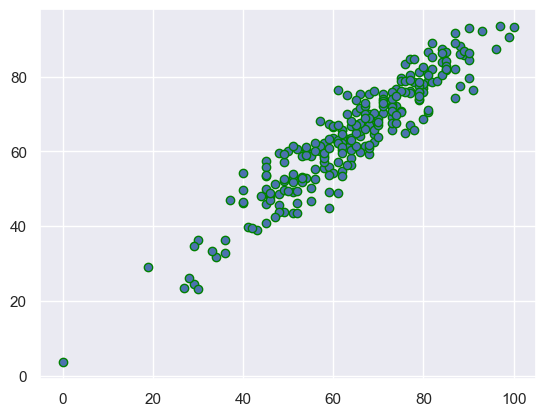

In [61]:
plt.scatter(y_test,y_pred_test_ridge,edgecolors='green')
plt.show()

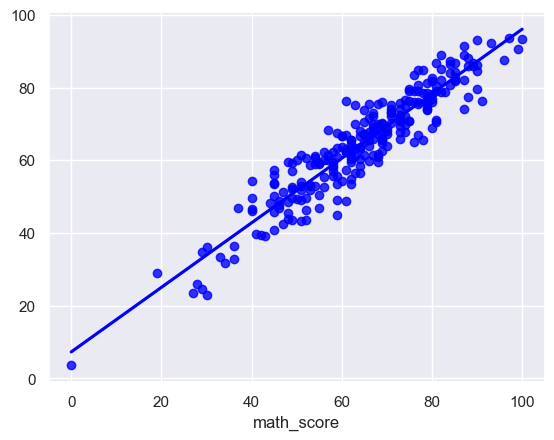

In [62]:
sns.regplot(x=y_test,y=y_pred_test_ridge,ci=None,color ='blue')
plt.show()

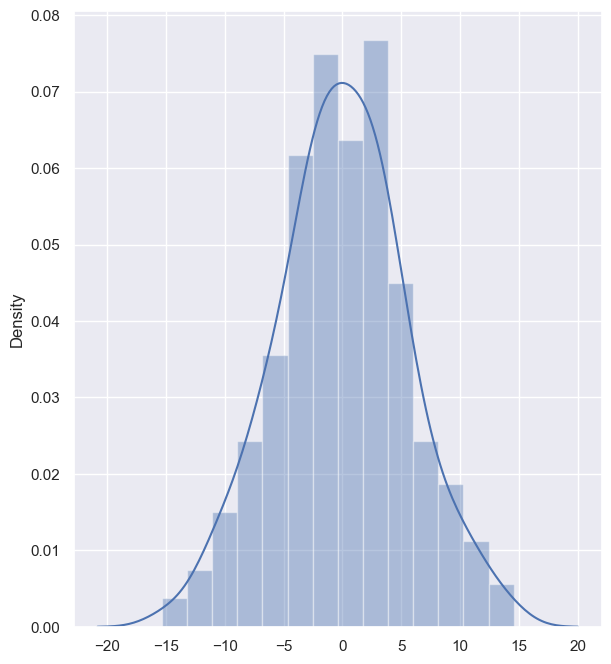

In [66]:
import scipy.stats as stats
plt.figure(figsize=(15,8))
plt.subplot(121)
sns.distplot(y_test-y_pred_test_ridge,kde=True)
plt.show()

# plt.subplot(1,2,2)
# stats.probplot(y_test-y_pred_test_ridge,dist='norm',plot=plt)
# plt.show()